In [117]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import fnmatch
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

In [2]:
CH_bonds=[("C1","H11"),("C2","H21"),("C3","H31"),
("C4","H41"),("C5","H51"),("C6","H61"),
("C7","H71"),("C8","H81"),("C9","H91"),
("C10","H101"),("C11","H111"),("C12","H121")]

In [119]:
begin=0
end=-1
RM_avail=True



moleculeType="all"
systems=["empty"]

folder_path="/media/nenciric/Ricky2020/Corys_peptides/full_trajectories/"
for j,file in enumerate(os.listdir(folder_path)):
    
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
    
            path = "/media/nenciric/Ricky2020/Corys_peptides/full_trajectories/"+os.fsdecode(file)+"/"
    

            
            for atom1, atom2 in CH_bonds:
                rt.CalculateCorrelationFunctions(path,begin,end,RM_avail,atom1,atom2,moleculeType)

Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 360000
Number of corelation functions to calculate: 1 

Calculatin correlation f

In [120]:
systems=["empty"]
folder_path="/media/nenciric/Ricky2020/Corys_peptides/full_trajectories/"
corr_path="/home/nenciric/Documents/git/CorysPeptides/effective_times/"
for j,file in enumerate(os.listdir(folder_path)):
    
    #print(j)
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
            
            try:
                os.system("mkdir "+corr_path+os.fsdecode(file))
            except:
                pass
            
            for i,file2 in enumerate(os.listdir(corr_path)):
                if os.fsdecode(file) in os.fsdecode(file2) and os.fsdecode(file)!=os.fsdecode(file2):

                    for k,bond in enumerate(CH_bonds):
                        bond_name=bond[0]+"_"+bond[1]
                        if bond_name in os.fsdecode(file2):
                            os.system("cp "+corr_path+os.fsdecode(file2)+"/NHrotaCF_0.xvg "+corr_path+os.fsdecode(file)+"/NHrotaCF_"+str(k)+".xvg")

                    #print(os.fsdecode(file),os.listdir(corr_path),j,i)
                    #print(j)

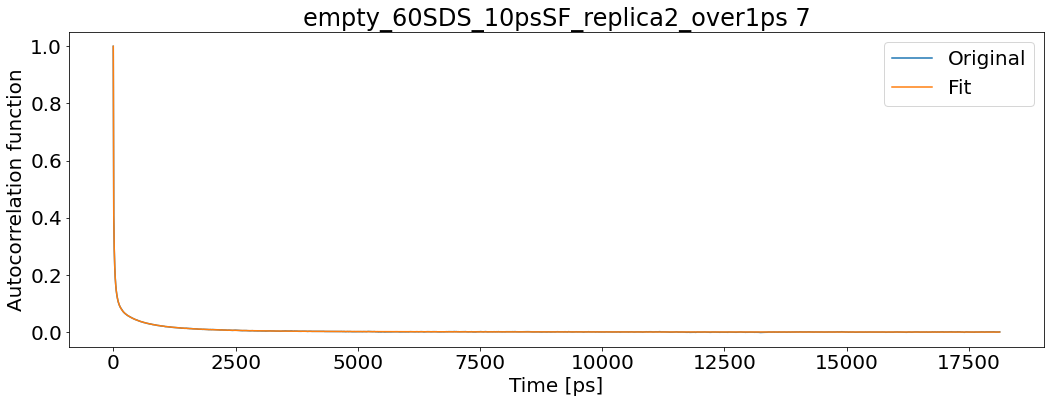

T1: 0.05637454187992191 T2: 0.037932201685074864 NOE: 0


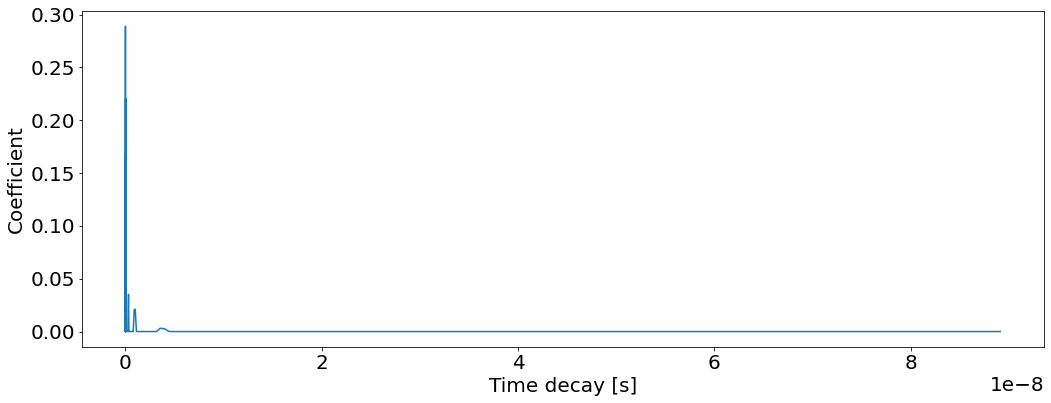

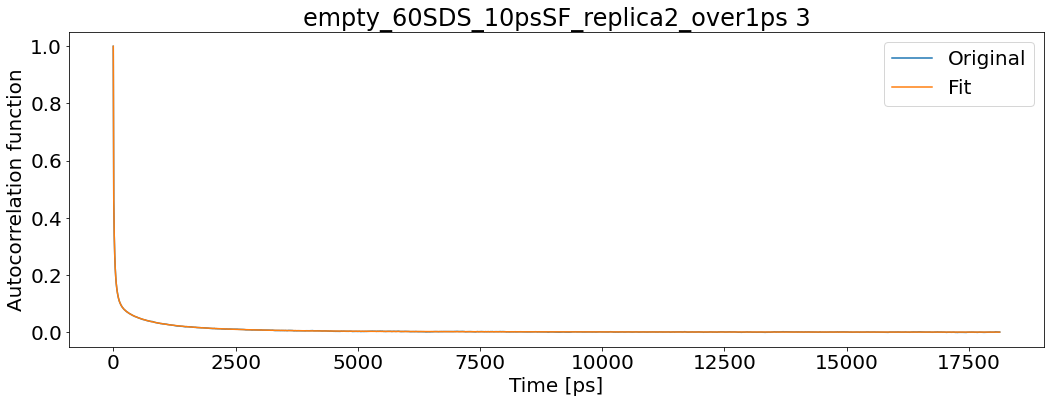

T1: 0.05038968381717636 T2: 0.03074904366511316 NOE: 0


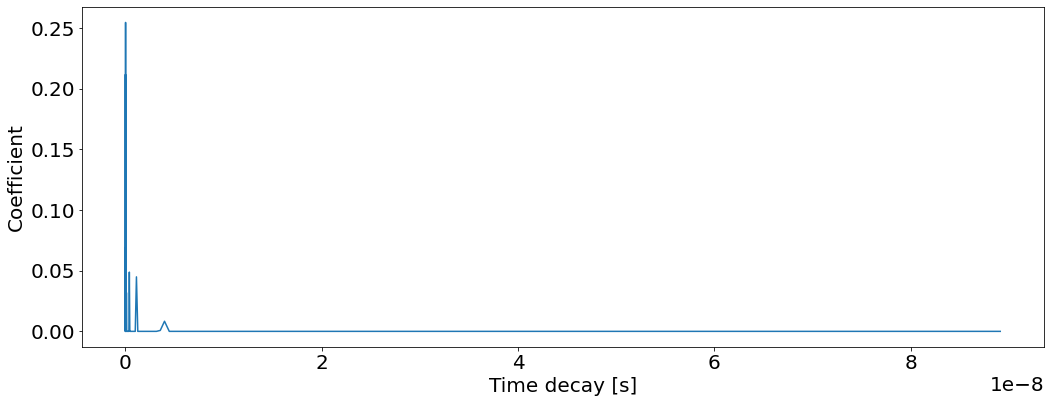

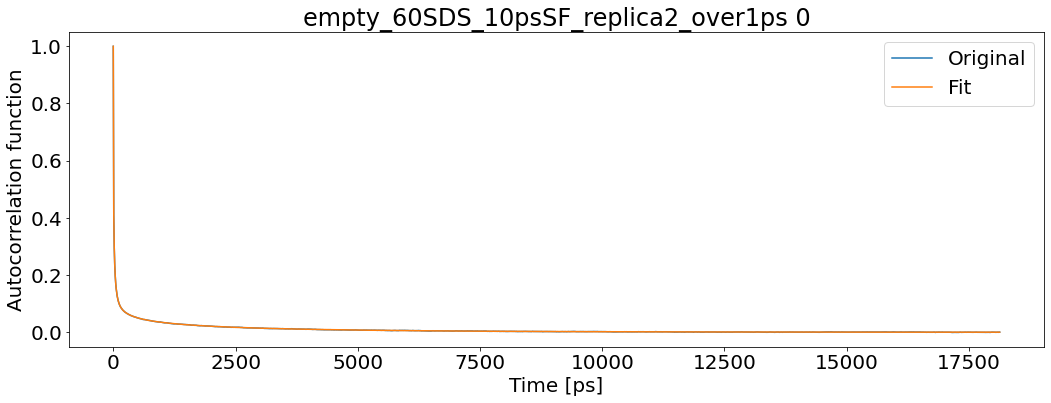

T1: 0.06319666159263274 T2: 0.02947423605616268 NOE: 0


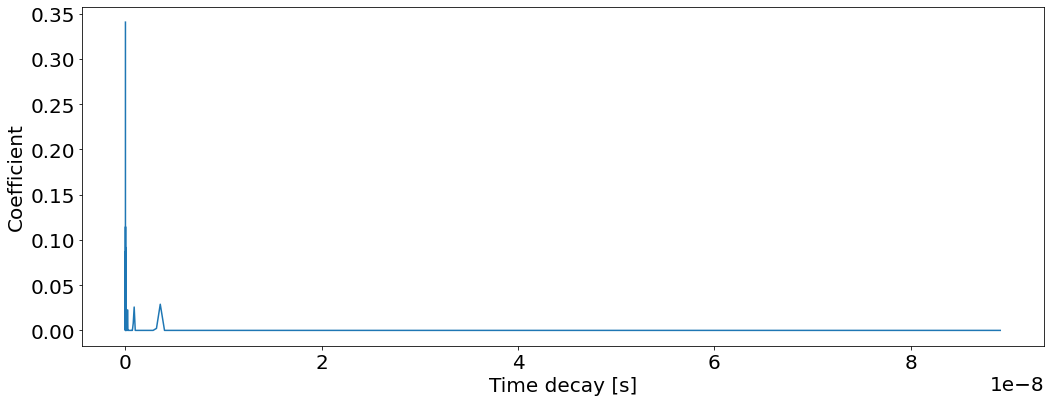

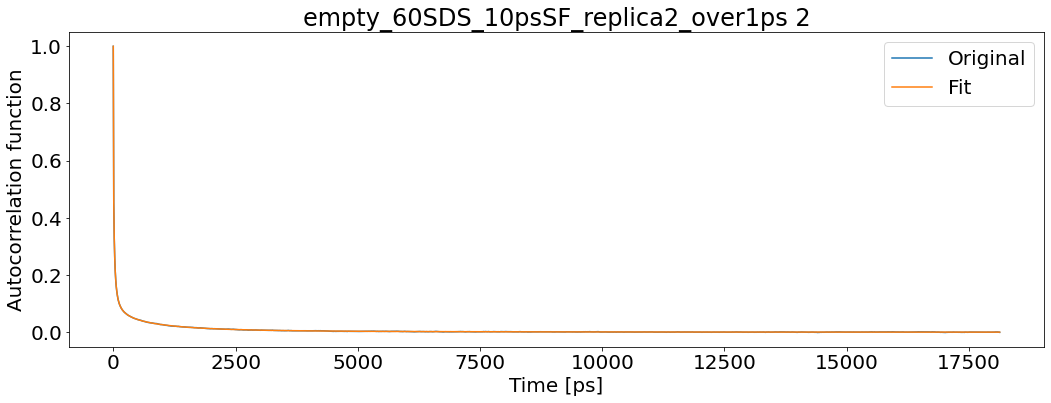

T1: 0.055305922722873775 T2: 0.03391955250322208 NOE: 0


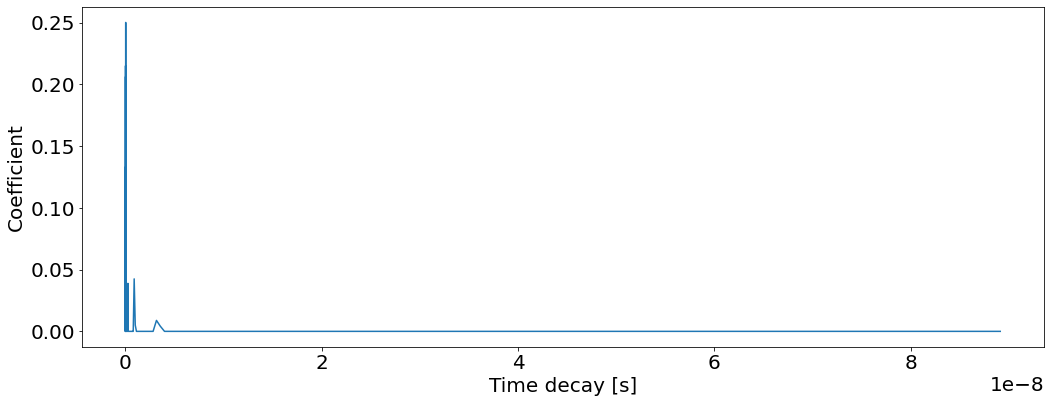

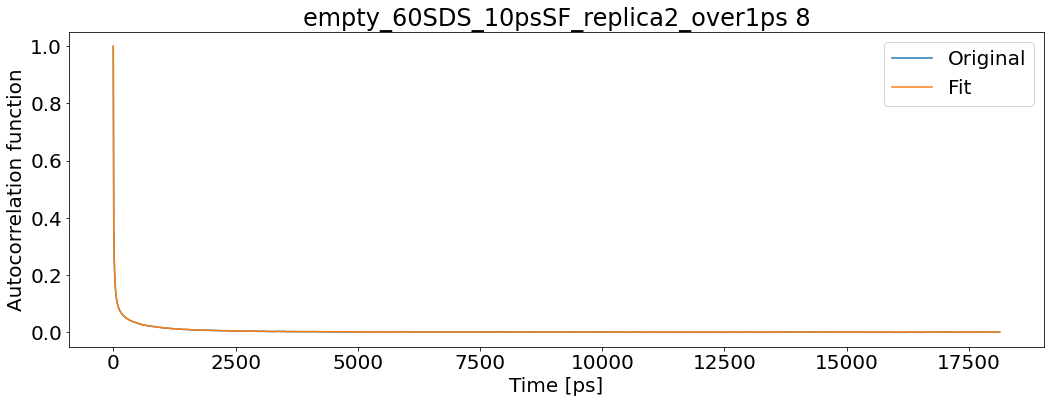

T1: 0.06630428010946164 T2: 0.04685664779568393 NOE: 0


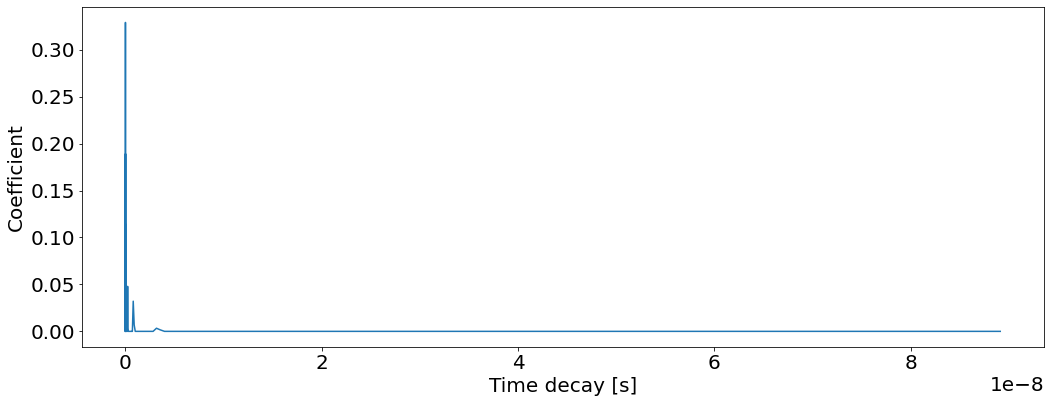

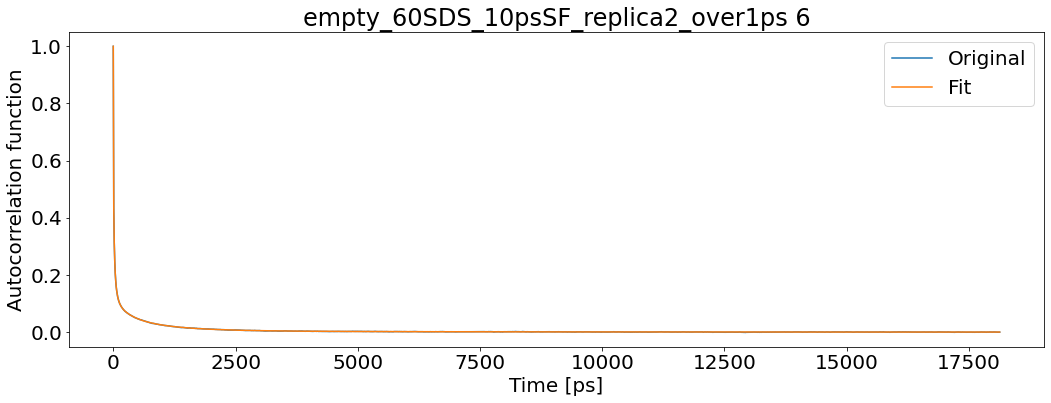

T1: 0.051855985245258446 T2: 0.03412846715792483 NOE: 0


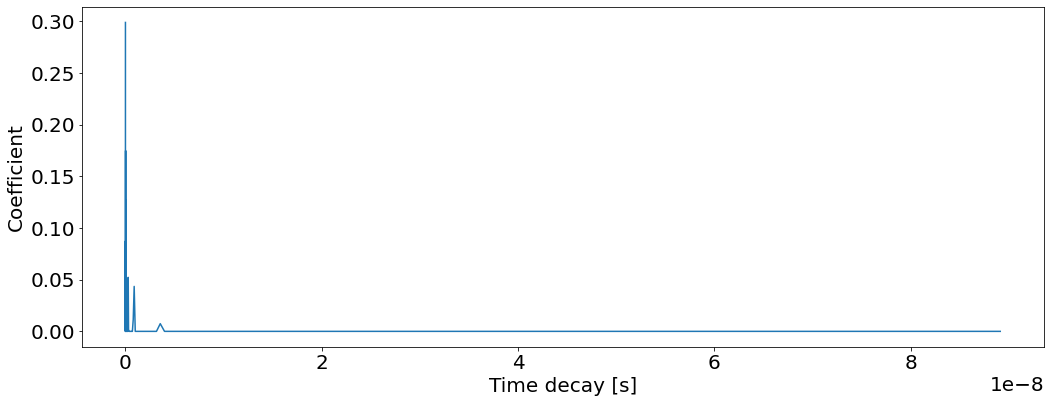

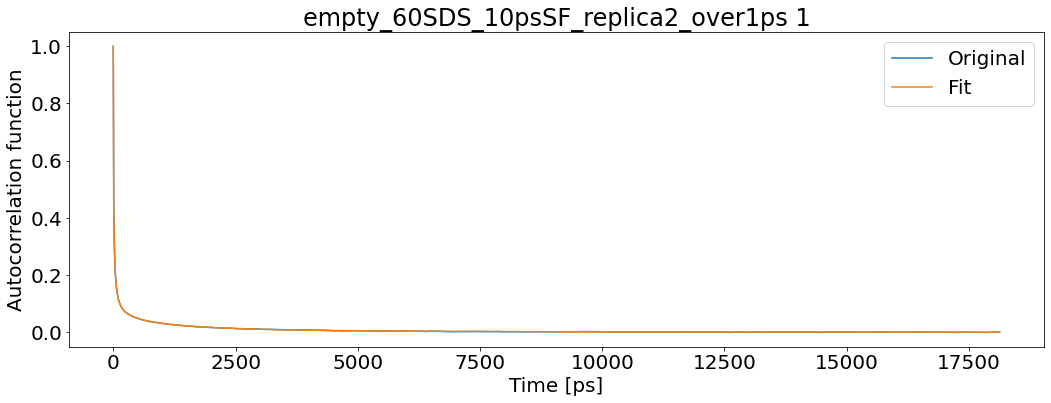

T1: 0.05643333096563874 T2: 0.030605114161150745 NOE: 0


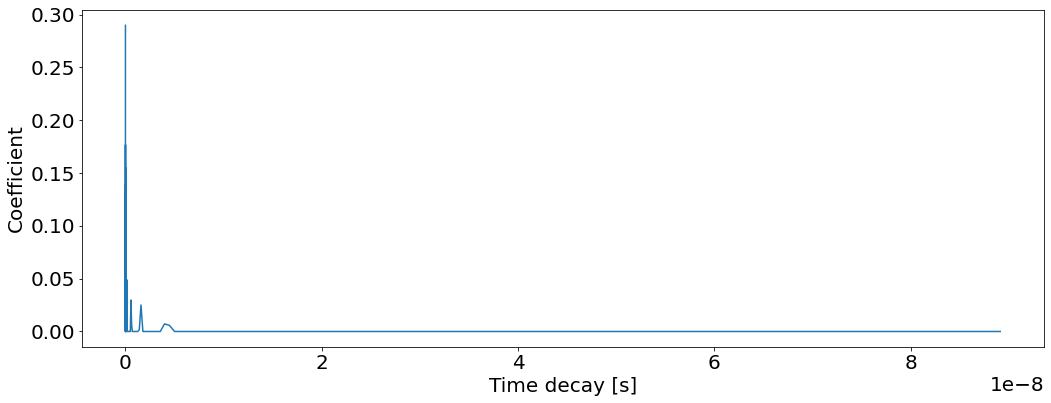

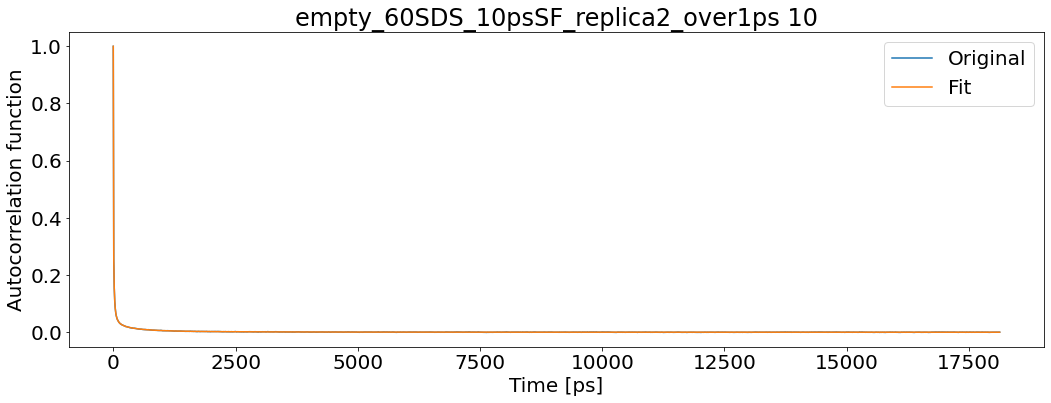

T1: 0.13010479975273315 T2: 0.10051733469691829 NOE: 0


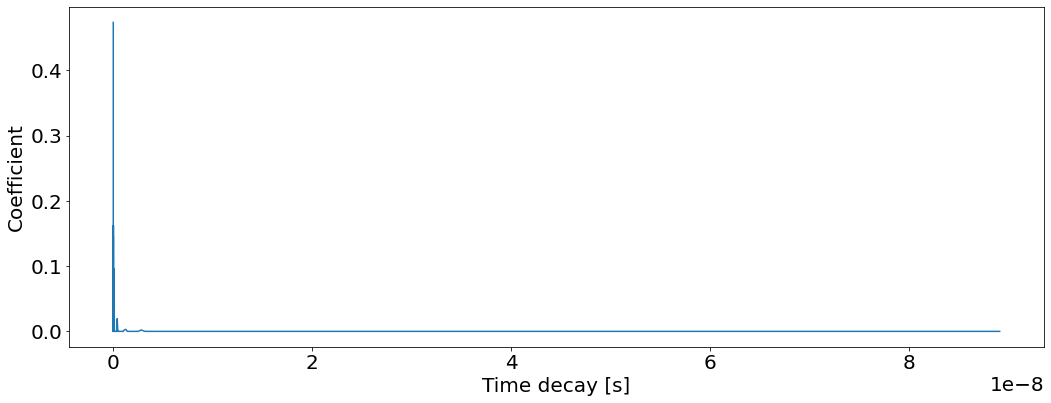

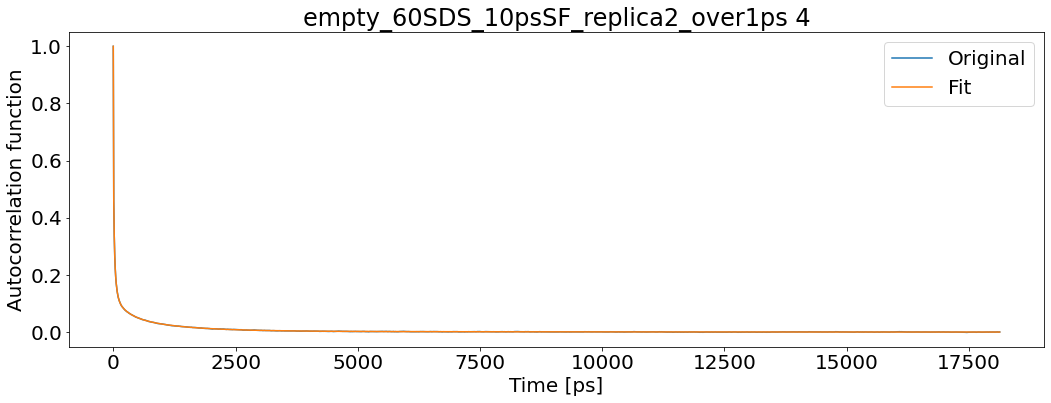

T1: 0.04990156209362927 T2: 0.03158129287055348 NOE: 0


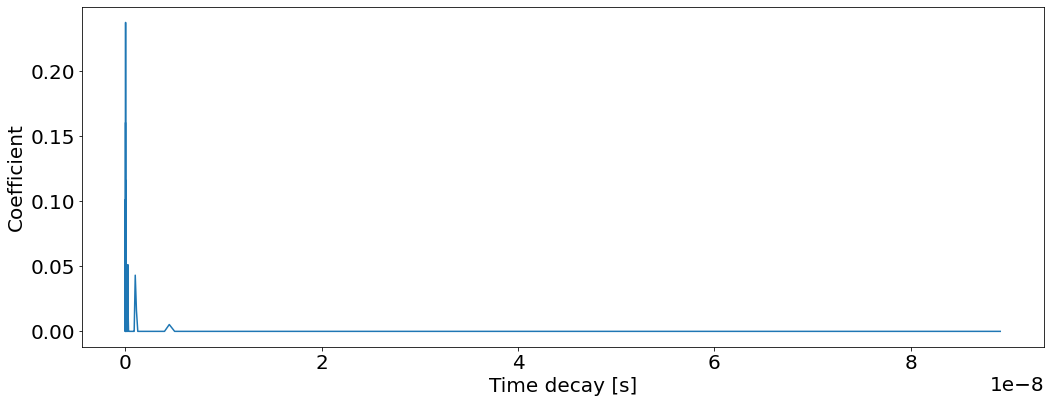

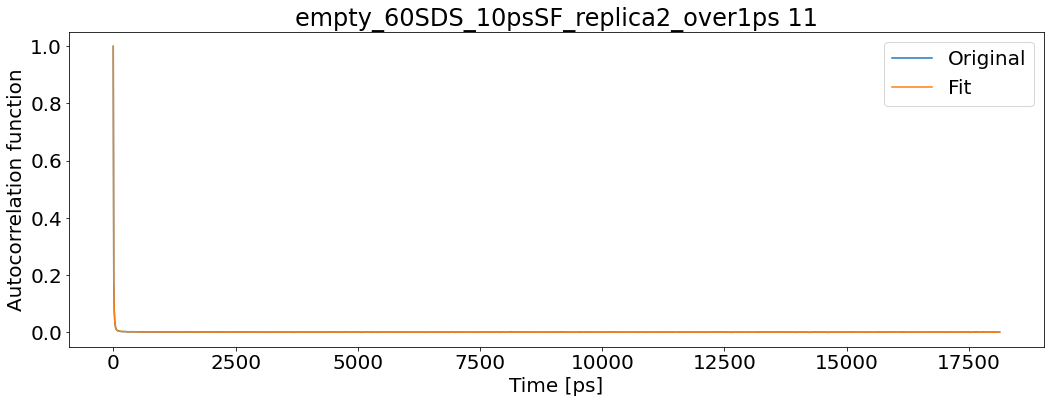

T1: 0.3375730593726166 T2: 0.3130104339348163 NOE: 0


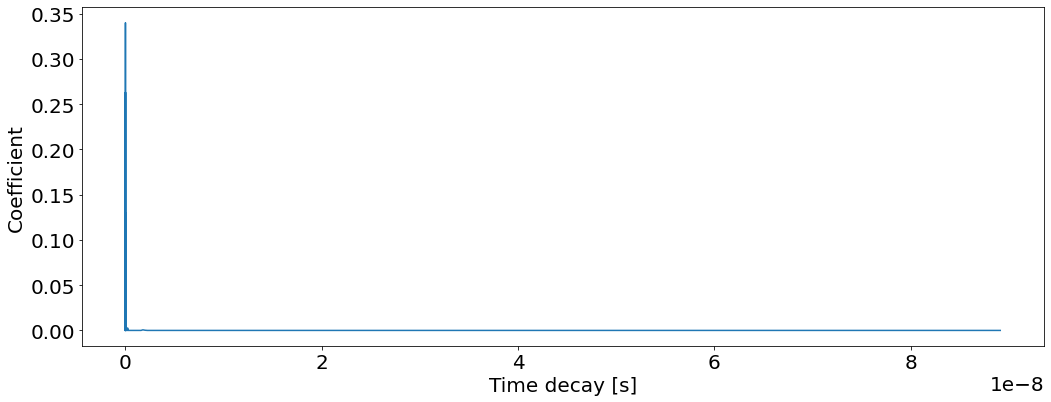

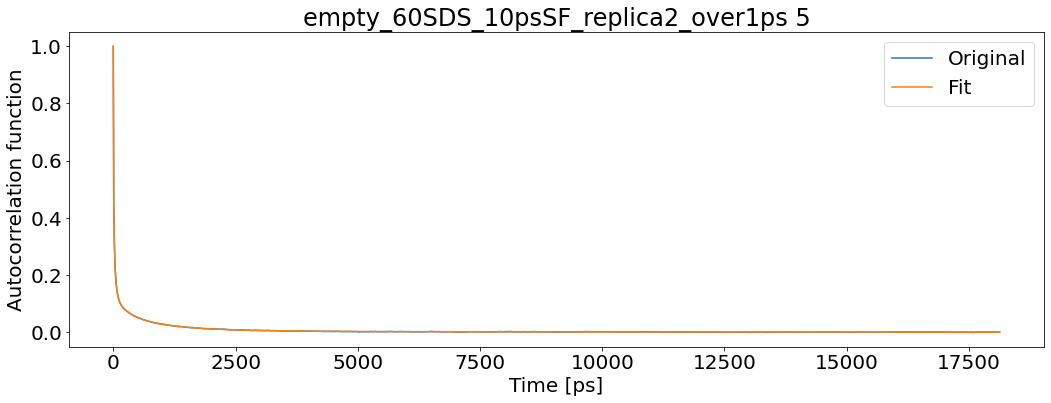

T1: 0.04946747992620517 T2: 0.03127192075701802 NOE: 0


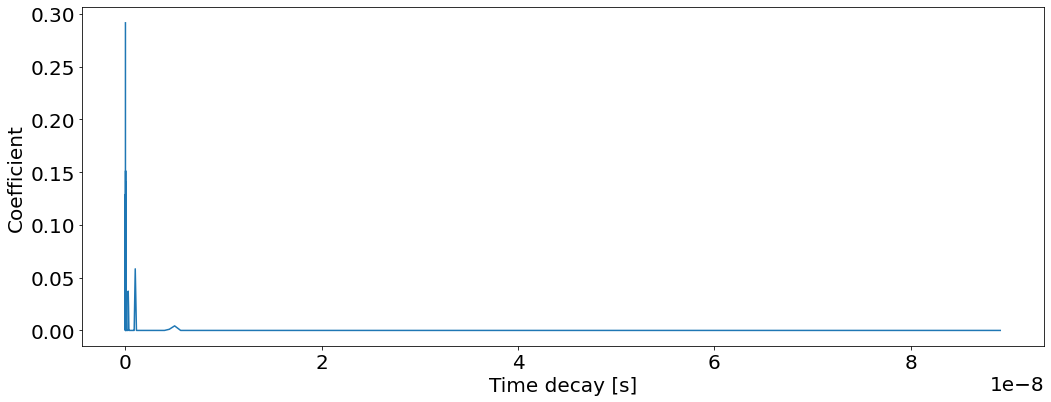

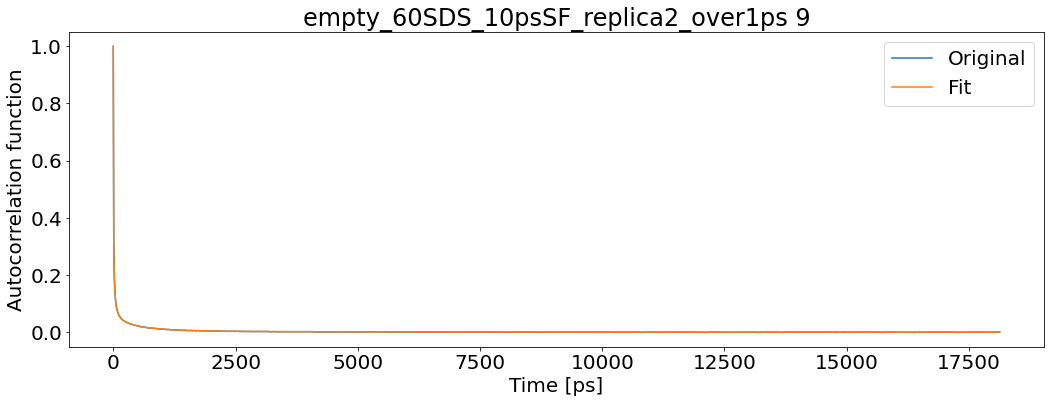

T1: 0.08674646650117668 T2: 0.06334557441780776 NOE: 0


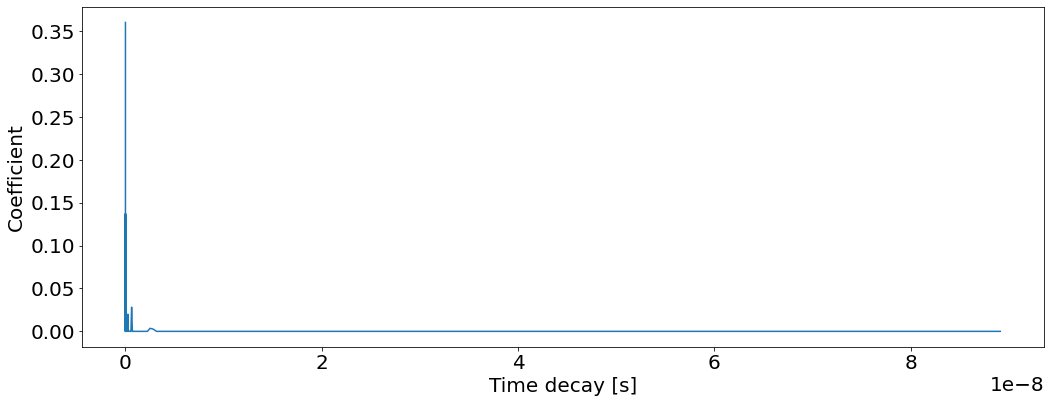

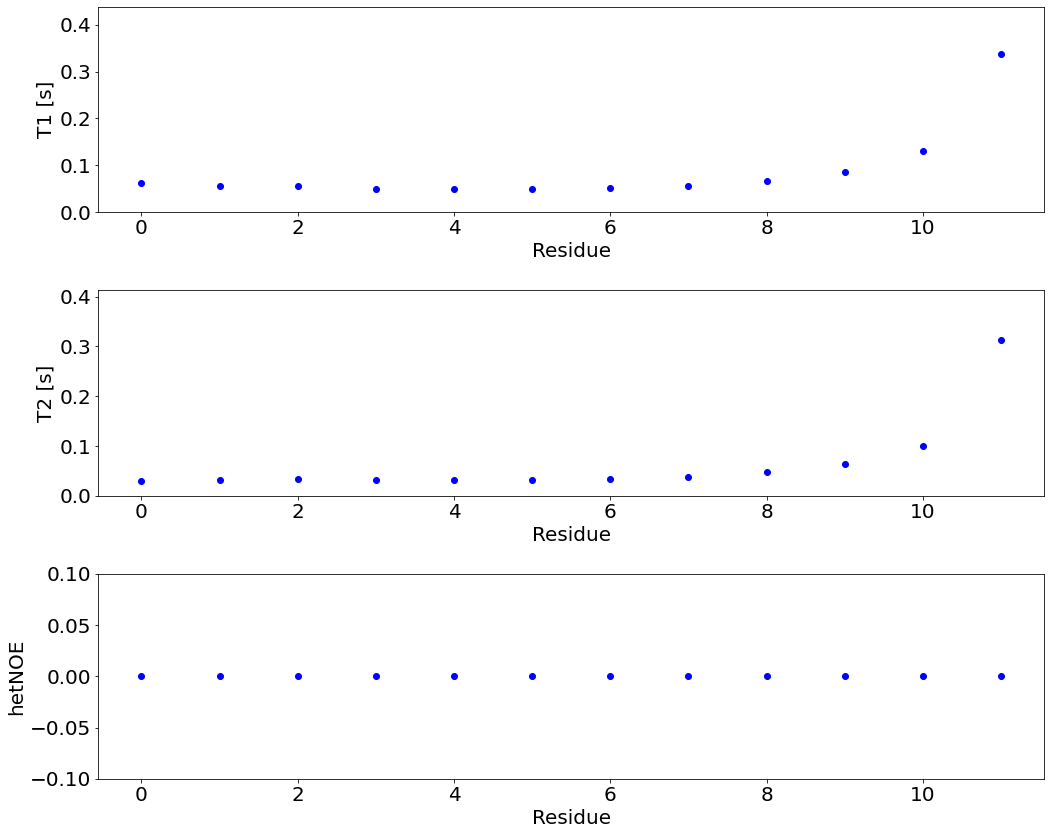

In [132]:
### New analysis, all times over 1 ps

folder_path2="/home/nenciric/Documents/git/CorysPeptides/effective_times/corr_func/"
output_path="/home/nenciric/Documents/git/CorysPeptides/effective_times/results/"

systems=["empty_60SDS_10p"]

OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/10 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen curl



#relaxations_1ps={}

for file in os.listdir(folder_path2):
    for system2 in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system2+"*"):
            system=os.fsdecode(file)
            folder_path=folder_path2+system+"/"
            output_name=system+"_over1ps"
            yaml_output=output_path+output_name+".yaml"
            relaxations_1ps[system]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name,yaml_output)
            rt.plot_T1_T2_noe(relaxations_1ps[system],"pic.png")


In [34]:
effective_times={}
for system in relaxations_1ps:
    effective_times[system]=np.zeros(12)
    for bond in relaxations_1ps[system]:

        effTime=sum(t*k for t,k in zip(relaxations_1ps[system][bond].Coeffs,
                      relaxations_1ps[system][bond].Ctimes))
        effective_times[system][int(bond)]=effTime

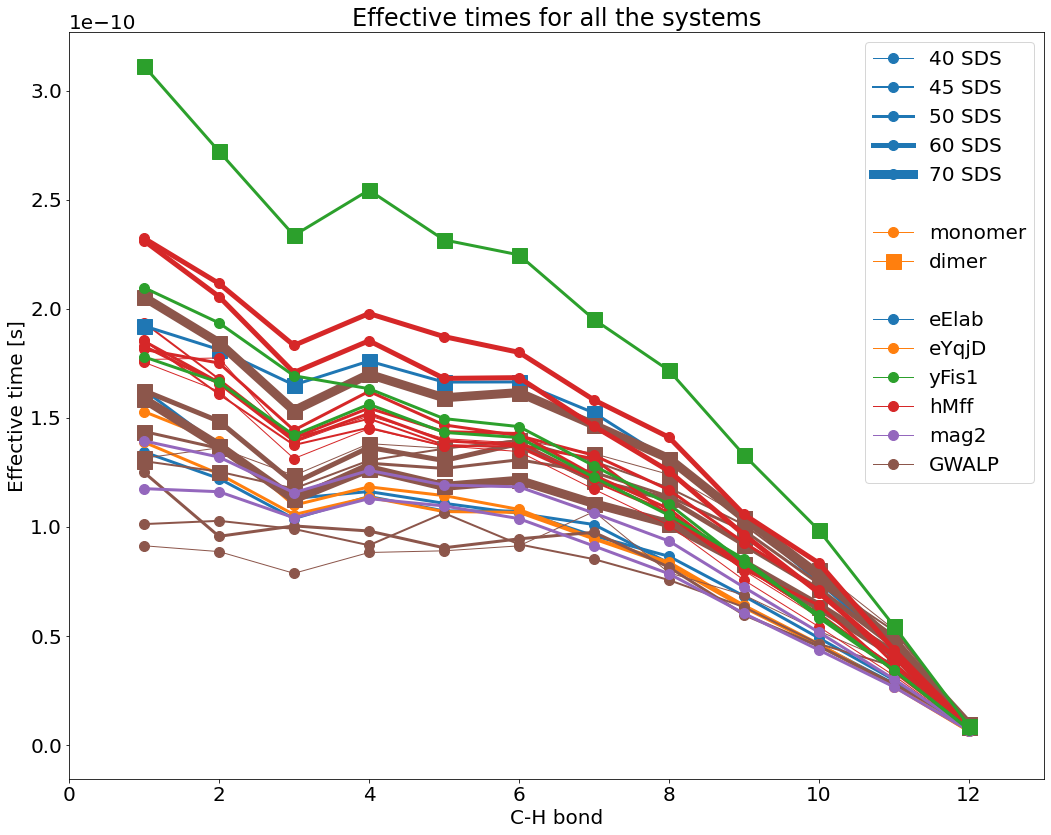

In [131]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
bonds=np.linspace(1,12,12)
for system in effective_times:
    if "40SDS" in system:
        lw=1
    elif "45SDS" in system:
        lw=2
    elif "50SDS" in system:
        lw=3
    elif "60SDS" in system: 
        lw=5
    elif "70SDS" in system:
        lw=9
        
    if "hMff" in system:
        cl="C3"
    if "eElab"  in system:
        cl="C0"
    if  "eElaB" in system:
        cl="C0"
    if "eYqjD" in system:
        cl="C1"
    if "GWALP" in system:
        cl="C5"
    if "mag2" in system:
        cl="C4"
    if "yFis" in system:
        cl="C2"
        
    if "dimer" in system:
        mrk="-s"
        ms=15
    else:
        mrk="-o"
        ms=10
        

    plt.plot(bonds,effective_times[system],mrk,linewidth=lw,c=cl,markersize=ms)

plt.xlim(0,13)
plt.plot(-5,0,mrk,linewidth=1,c="C0",markersize=ms,label="40 SDS")
plt.plot(-5,0,mrk,linewidth=2,c="C0",markersize=ms,label="45 SDS")
plt.plot(-5,0,mrk,linewidth=3,c="C0",markersize=ms,label="50 SDS")
plt.plot(-5,0,mrk,linewidth=5,c="C0",markersize=ms,label="60 SDS")
plt.plot(-5,0,mrk,linewidth=9,c="C0",markersize=ms,label="70 SDS")
plt.plot(-5,0,"-o",linewidth=1,c="white",markersize=10,label="  ")
plt.plot(-5,0,"-o",linewidth=1,c="C1",markersize=10,label="monomer")
plt.plot(-5,0,"-s",linewidth=1,c="C1",markersize=15,label="dimer")
plt.plot(-5,0,"-o",linewidth=1,c="white",markersize=10,label="  ")
plt.plot(-5,0,"-o",linewidth=1,c="C0",markersize=10,label="eElab")
plt.plot(-5,0,"-o",linewidth=1,c="C1",markersize=10,label="eYqjD")
plt.plot(-5,0,"-o",linewidth=1,c="C2",markersize=10,label="yFis1")
plt.plot(-5,0,"-o",linewidth=1,c="C3",markersize=10,label="hMff")
plt.plot(-5,0,"-o",linewidth=1,c="C4",markersize=10,label="mag2")
plt.plot(-5,0,"-o",linewidth=1,c="C5",markersize=10,label="GWALP")

plt.title("Effective times for all the systems")
plt.xlabel("C-H bond")
plt.ylabel("Effective time [s]")
plt.legend()

plt.savefig("Eff_all.png")

In [43]:
for system in effective_times:
    print(system)

hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
GWALP_dimer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_dimer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica2
GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_monomer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3
hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OP

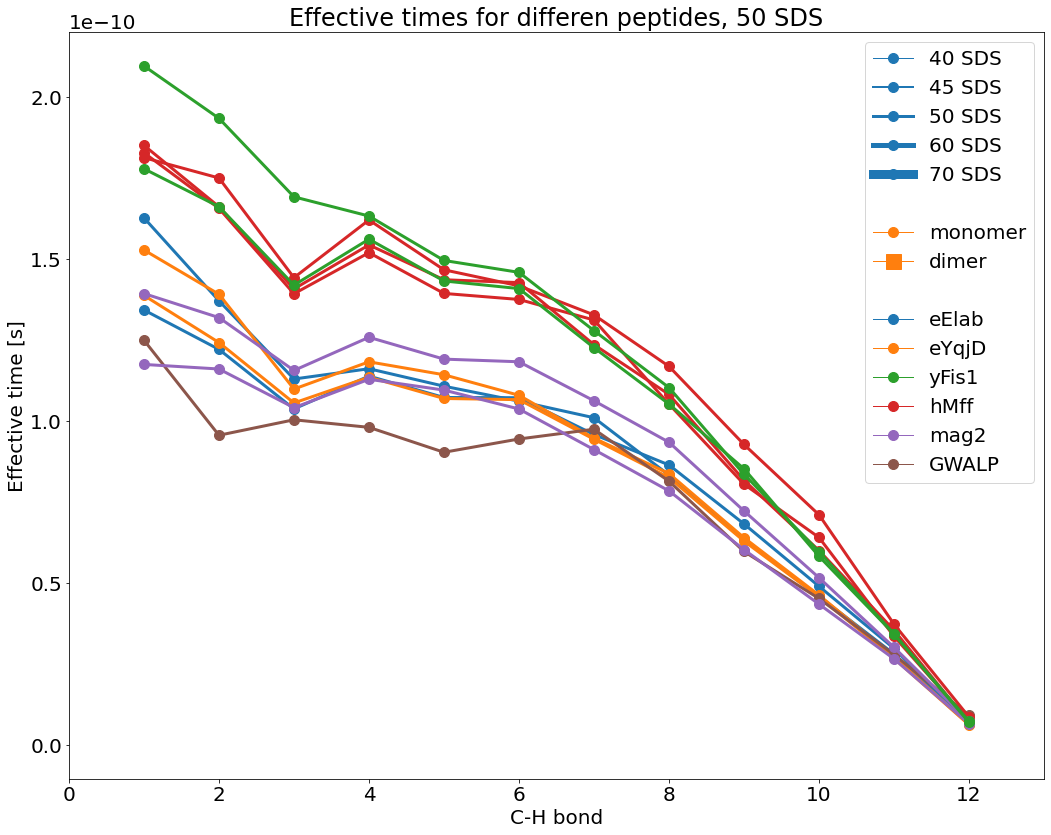

In [130]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

bonds=np.linspace(1,12,12)
for system in effective_times:
    if "40SDS" in system:
        lw=1
    elif "45SDS" in system:
        lw=2
    elif "50SDS" in system:
        lw=3
    elif "60SDS" in system: 
        lw=5
    elif "70SDS" in system:
        lw=9
        
    if "hMff" in system:

        cl="C3"
    if "eElab"  in system:
        cl="C0"
    if  "eElaB" in system:
        cl="C0"
    if "eYqjD" in system:
        cl="C1"
    if "GWALP" in system:
        cl="C5"
    if "mag2" in system:
        cl="C4"
    if "yFis" in system:
        cl="C2"
        
    if "dimer" in system:

        mrk="-s"
        ms=15
    else:

        mrk="-o"
        ms=10
        
    if "50SDS" in system :
        if not "dimer" in system :
            plt.plot(bonds,effective_times[system],mrk,linewidth=lw,c=cl,markersize=ms)
        

plt.xlim(0,13)
plt.plot(-5,0,mrk,linewidth=1,c="C0",markersize=ms,label="40 SDS")
plt.plot(-5,0,mrk,linewidth=2,c="C0",markersize=ms,label="45 SDS")
plt.plot(-5,0,mrk,linewidth=3,c="C0",markersize=ms,label="50 SDS")
plt.plot(-5,0,mrk,linewidth=5,c="C0",markersize=ms,label="60 SDS")
plt.plot(-5,0,mrk,linewidth=9,c="C0",markersize=ms,label="70 SDS")
plt.plot(-5,0,"-o",linewidth=1,c="white",markersize=10,label="  ")
plt.plot(-5,0,"-o",linewidth=1,c="C1",markersize=10,label="monomer")
plt.plot(-5,0,"-s",linewidth=1,c="C1",markersize=15,label="dimer")
plt.plot(-5,0,"-o",linewidth=1,c="white",markersize=10,label="  ")
plt.plot(-5,0,"-o",linewidth=1,c="C0",markersize=10,label="eElab")
plt.plot(-5,0,"-o",linewidth=1,c="C1",markersize=10,label="eYqjD")
plt.plot(-5,0,"-o",linewidth=1,c="C2",markersize=10,label="yFis1")
plt.plot(-5,0,"-o",linewidth=1,c="C3",markersize=10,label="hMff")
plt.plot(-5,0,"-o",linewidth=1,c="C4",markersize=10,label="mag2")
plt.plot(-5,0,"-o",linewidth=1,c="C5",markersize=10,label="GWALP")




plt.legend()


plt.title("Effective times for differen peptides, 50 SDS")
plt.xlabel("C-H bond")
plt.ylabel("Effective time [s]")


plt.savefig("Eff_difPept.png")

In [133]:
relaxations_1ps

{'empty_60SDS_100fsSF_replica1': {7: <relaxation_times.GetRelaxationData at 0x7f4acb87b490>,
  3: <relaxation_times.GetRelaxationData at 0x7f4acbc835b0>,
  0: <relaxation_times.GetRelaxationData at 0x7f4acaeadea0>,
  2: <relaxation_times.GetRelaxationData at 0x7f4acbc83490>,
  8: <relaxation_times.GetRelaxationData at 0x7f4acb854250>,
  6: <relaxation_times.GetRelaxationData at 0x7f4acb8fc430>,
  1: <relaxation_times.GetRelaxationData at 0x7f4ad8984a90>,
  10: <relaxation_times.GetRelaxationData at 0x7f4ad8986e30>,
  4: <relaxation_times.GetRelaxationData at 0x7f4acb2da920>,
  11: <relaxation_times.GetRelaxationData at 0x7f4acb2d8760>,
  5: <relaxation_times.GetRelaxationData at 0x7f4ae12d18a0>,
  9: <relaxation_times.GetRelaxationData at 0x7f4ae11813c0>},
 'empty_60SDS_10psSF_replica2': {7: <relaxation_times.GetRelaxationData at 0x7f4aca83dfc0>,
  3: <relaxation_times.GetRelaxationData at 0x7f4acba66e90>,
  0: <relaxation_times.GetRelaxationData at 0x7f4acbb189d0>,
  2: <relaxation_ti

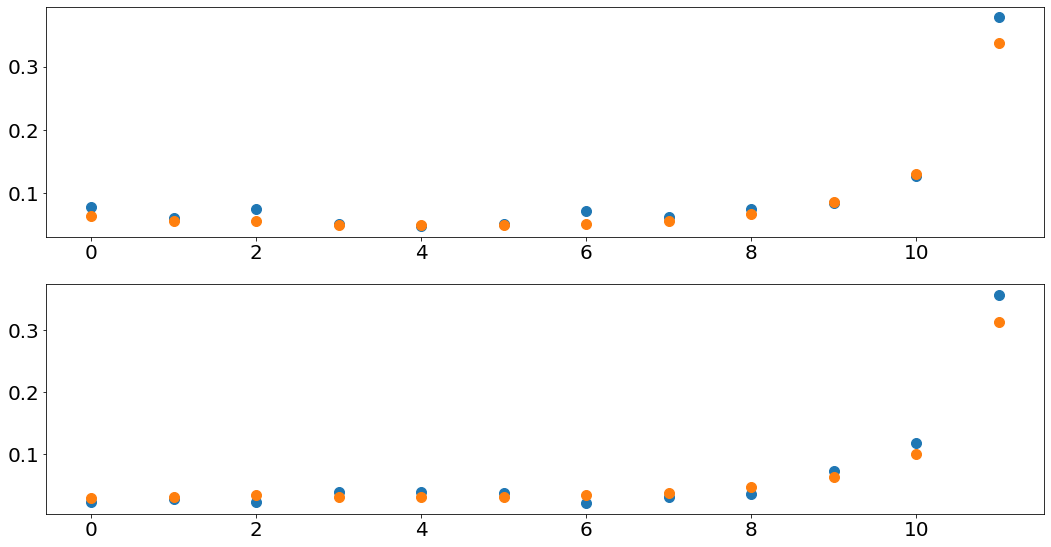

In [136]:
plt.rcParams.update({'font.size': 20})

plt.rcParams["figure.figsize"] = [15.00, 8]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(2,1)
fig.patch.set_facecolor('xkcd:white')

(ax1, ax2)=axes.flatten()
for i,system in enumerate(relaxations_1ps):
    for peak in relaxations_1ps[system]:
        ax1.plot(peak,relaxations_1ps[system][peak].T1,"o",markersize=10,c="C"+str(i))
        ax2.plot(peak,relaxations_1ps[system][peak].T2,"o",markersize=10,c="C"+str(i))